# What is a heart attack?

A heart attck is a medical emergency in which your heart muscle starts to die because it's not getting enough blood flow.

### How do heart attacks happen?
* The coronary arteries are responsible for supplying oxygen-rich blood to the heart muscle, ensuring that it has the energy it needs to pump blood throughtout the body.
* During a heart atttack, these arteries can become blocked as plque builds up on their walls.
* If the plaque ruptures, it triggers a blood clot, which cab obstruct the artery, preventing the flow of blood through it.

# 2. Data Preparation

## 2.1 Library import

* NumPy (np):
Used for numerical computations, particularly for array manipulations and performing mathematical operations efficiently.

* Pandas (pd):
Provides tools for data manipulation and analysis, focusing on structured data in the form of DataFrames.

* Matplotlib (plt):
A foundational library for creating static, interactive, and animated visualizations.

* Seaborn (sns):
A higher-level visualization library built on Matplotlib, used for creating aesthetically pleasing statistical graphics.

* Matplotlib rcParams:
Provides a way to customize the appearance and settings of plots.

* Plotly Express (px):
Enables the creation of interactive visualizations, such as scatter plots, line charts, and bar plots.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
import plotly.express as px



%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## 2.2 Data set loading

In [ ]:
df1 = pd.read_csv('heart.csv')
df2 = pd.read_csv('o2Saturation.csv')

## 2.3 Initial analysis of the data set

In [ ]:
df1.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df2.head()

,98.6
0,98.6
1,98.6
2,98.6
3,98.1
4,97.5


In [ ]:
#Merge Data
df = pd.merge(df1, df2, left_index=True, right_index=True)

df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,98.6
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,98.6
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,98.6
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,98.1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,97.5


In [ ]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,98.6
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,97.480858
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.346740
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,96.500000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,97.500000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,97.500000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,97.500000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,98.600000


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output', '98.6'],
      dtype='object')

In [ ]:
# Rename Columns
df.rename(columns={'98.6': 'o2_saturation',
                   'trtbps':'blood_pressure',
                   'chol':'cholestoral',
                   'thalachh':'max_heart_rate',
                   'exng':'exercise'}, inplace=True)

### 2.3.1 Analysis results

In [ ]:
df.output.value_counts()

,count
output,
1,165
0,138


In [ ]:
df.sex.value_counts()

,count
sex,
1,207
0,96


In [ ]:
df.cp.value_counts()
print(
    '\n Value 1: typical angina  =',df.cp.value_counts()[0],"\n",
      'Value 2: atypical angina =',df.cp.value_counts()[1],"\n",
      'Value 3: non-anginal pain=',df.cp.value_counts()[2],"\n",
      'Value 4: asymptomatic    =',df.cp.value_counts()[3])


 Value 1: typical angina  = 143 
 Value 2: atypical angina = 50 
 Value 3: non-anginal pain= 87 
 Value 4: asymptomatic    = 23


A heatmap is a graphical representation of data where individual values contained in a matrix are represented as colors. In this case, the heatmap is used to visualize the correlation matrix of a dataset. Correlation measures the statistical relationship between two variables, with values ranging between:

* 1.0: Perfect positive correlation.
* 0.0: No correlation.
* -1.0: Perfect negative correlation.

<Axes: >

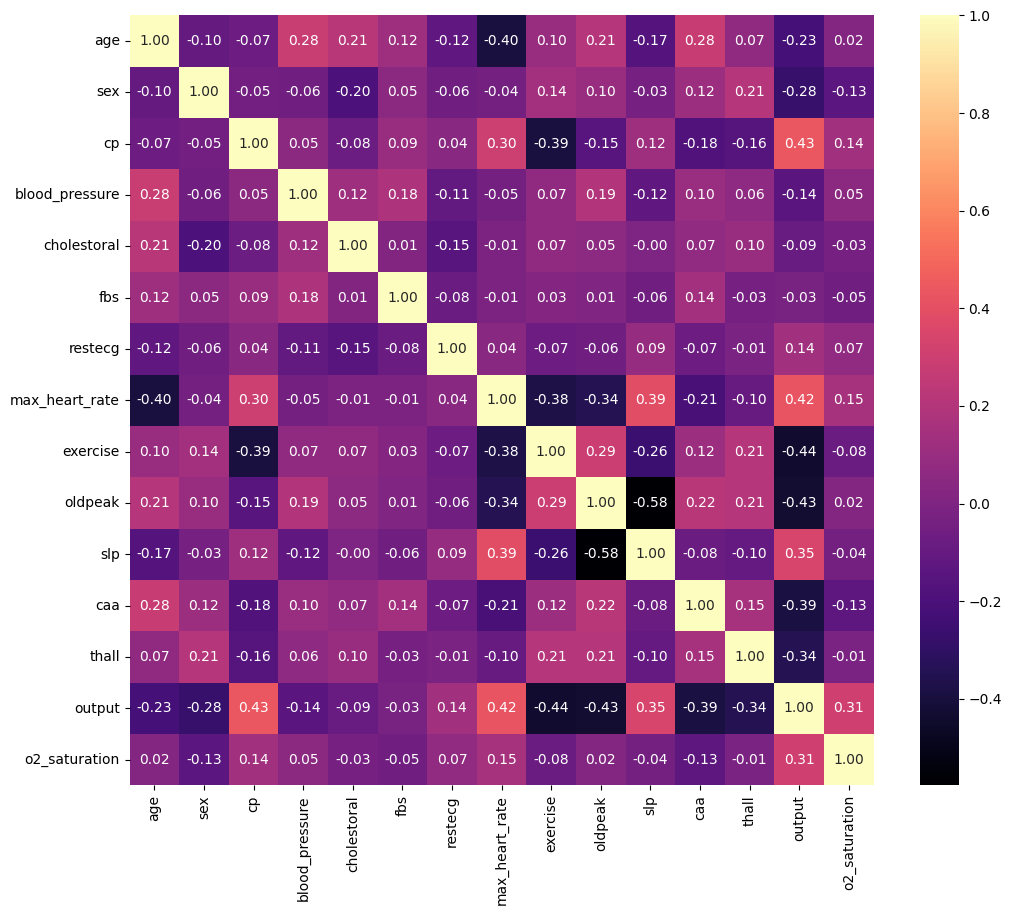

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

1. Variable-Specific Patterns:

* Each subplot corresponds to a column in the dataset.
Examples:
** age: A roughly normal distribution with most data concentrated between 40 and 70.
** cholesterol: Skewed distribution, indicating a wide range of cholesterol levels.
** output: Likely a binary variable, as it shows two distinct categories (0 and 1).
** max_heart_rate: A bell-shaped curve, suggesting a normal distribution.
oldpeak: Right-skewed distribution, with most values near 0 and a few outliers.
2. Discrete vs. Continuous Variables:

* Discrete variables like sex, exercise, cp, restecg have distinct bars, indicating a few unique categories.
Continuous variables like age, cholesterol, oldpeak show a smoother spread of values.
Potential Outliers:

* Variables like cholesterol and oldpeak might have outliers, as there are some unusually high or low values compared to the majority of the data.

3. Potential Outliers:

* Variables like cholesterol and oldpeak might have outliers, as there are some unusually high or low values compared to the majority of the data.

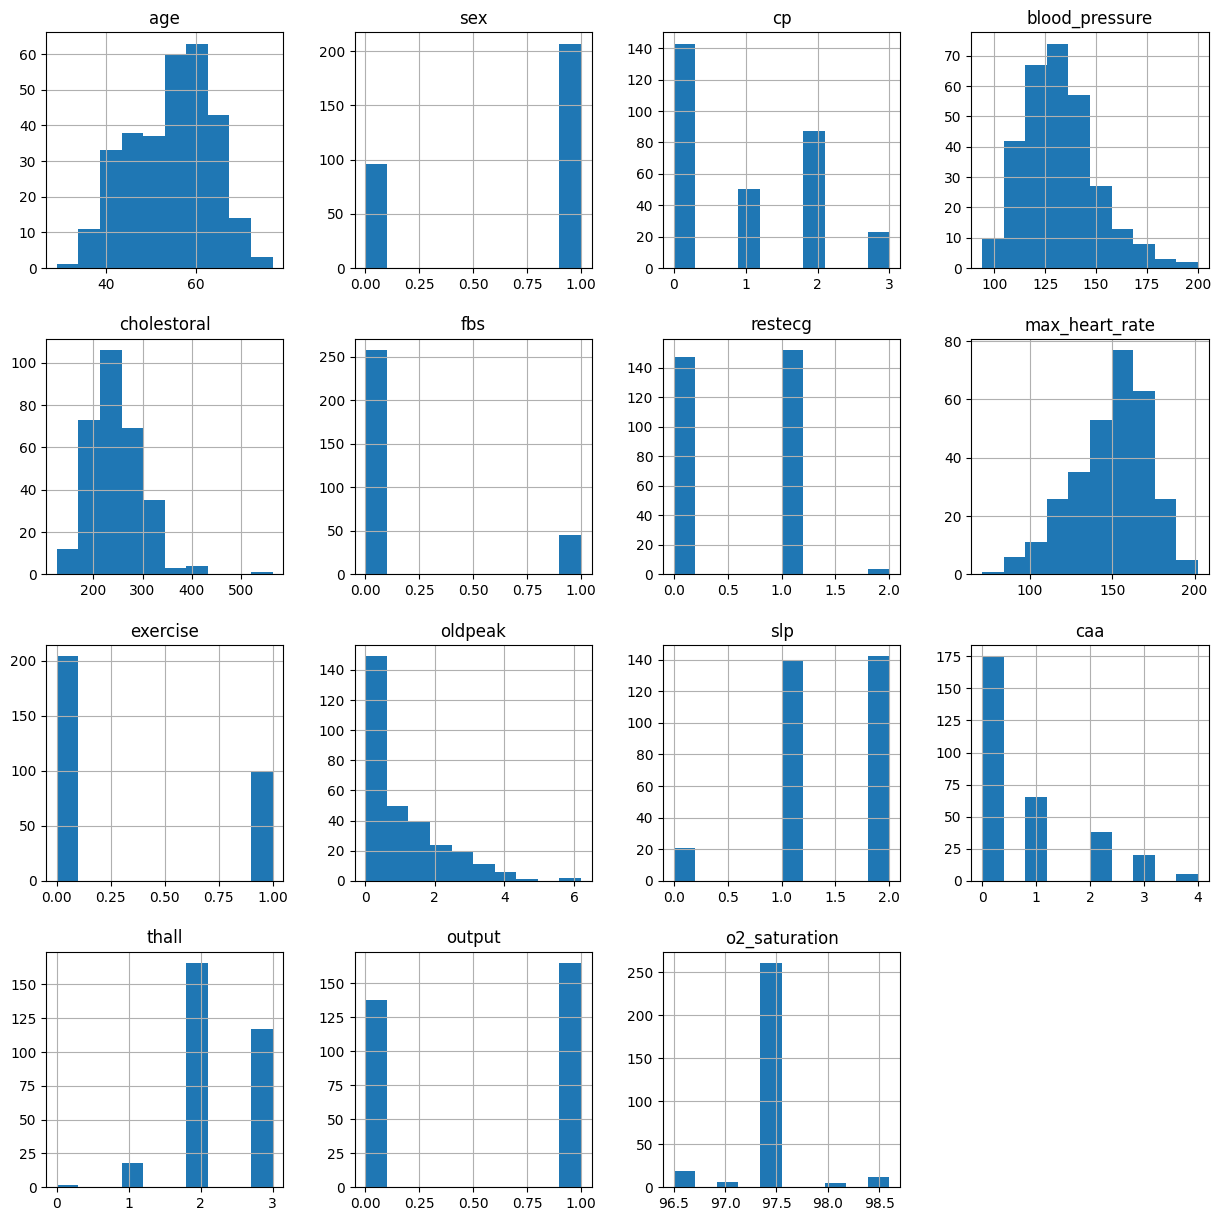

In [ ]:
df.hist(figsize=(15,15))
plt.show()

Text(0.5, 1.0, 'Count of each Target Class')

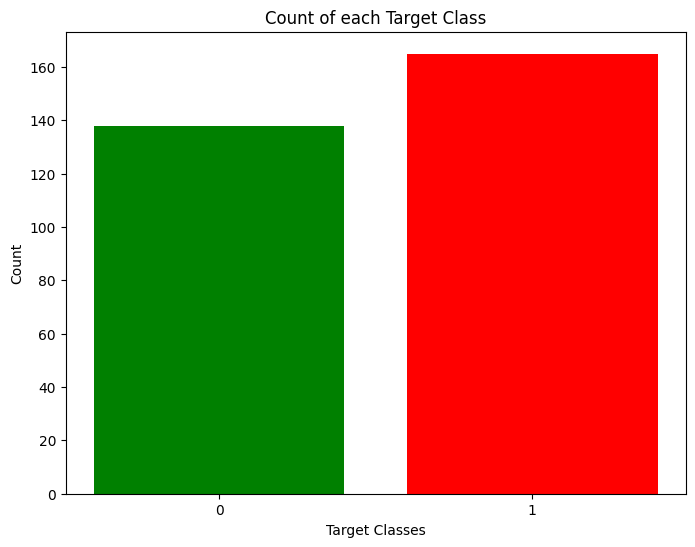

In [ ]:
rcParams['figure.figsize'] = 8,6
plt.bar(df['output'].unique(), df['output'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [ ]:
for i in df.columns:
    print(i,len(df[i].unique()))

age 41
sex 2
cp 4
blood_pressure 49
cholestoral 152
fbs 2
restecg 3
max_heart_rate 91
exercise 2
oldpeak 40
slp 3
caa 5
thall 4
output 2
o2_saturation 7


1. **Age Distribution**:
   - The KDE shows a peak around 55–60, indicating most observations fall within this range.
   - The distribution is slightly right-skewed.

2. **Blood Pressure Distribution**:
   - The curve peaks around 125–140, suggesting that most individuals in the dataset have blood pressure in this range.
   - The distribution is slightly skewed to the right.

3. **Cholesterol Distribution**:
   - A sharp peak around 200–250 is observed, but the distribution has a long tail to the right, indicating the presence of high cholesterol outliers.

4. **Max Heart Rate Distribution**:
   - The curve peaks around 140–160, showing that the majority of individuals have their maximum heart rate in this range.
   - The distribution is approximately symmetric with slight variation.


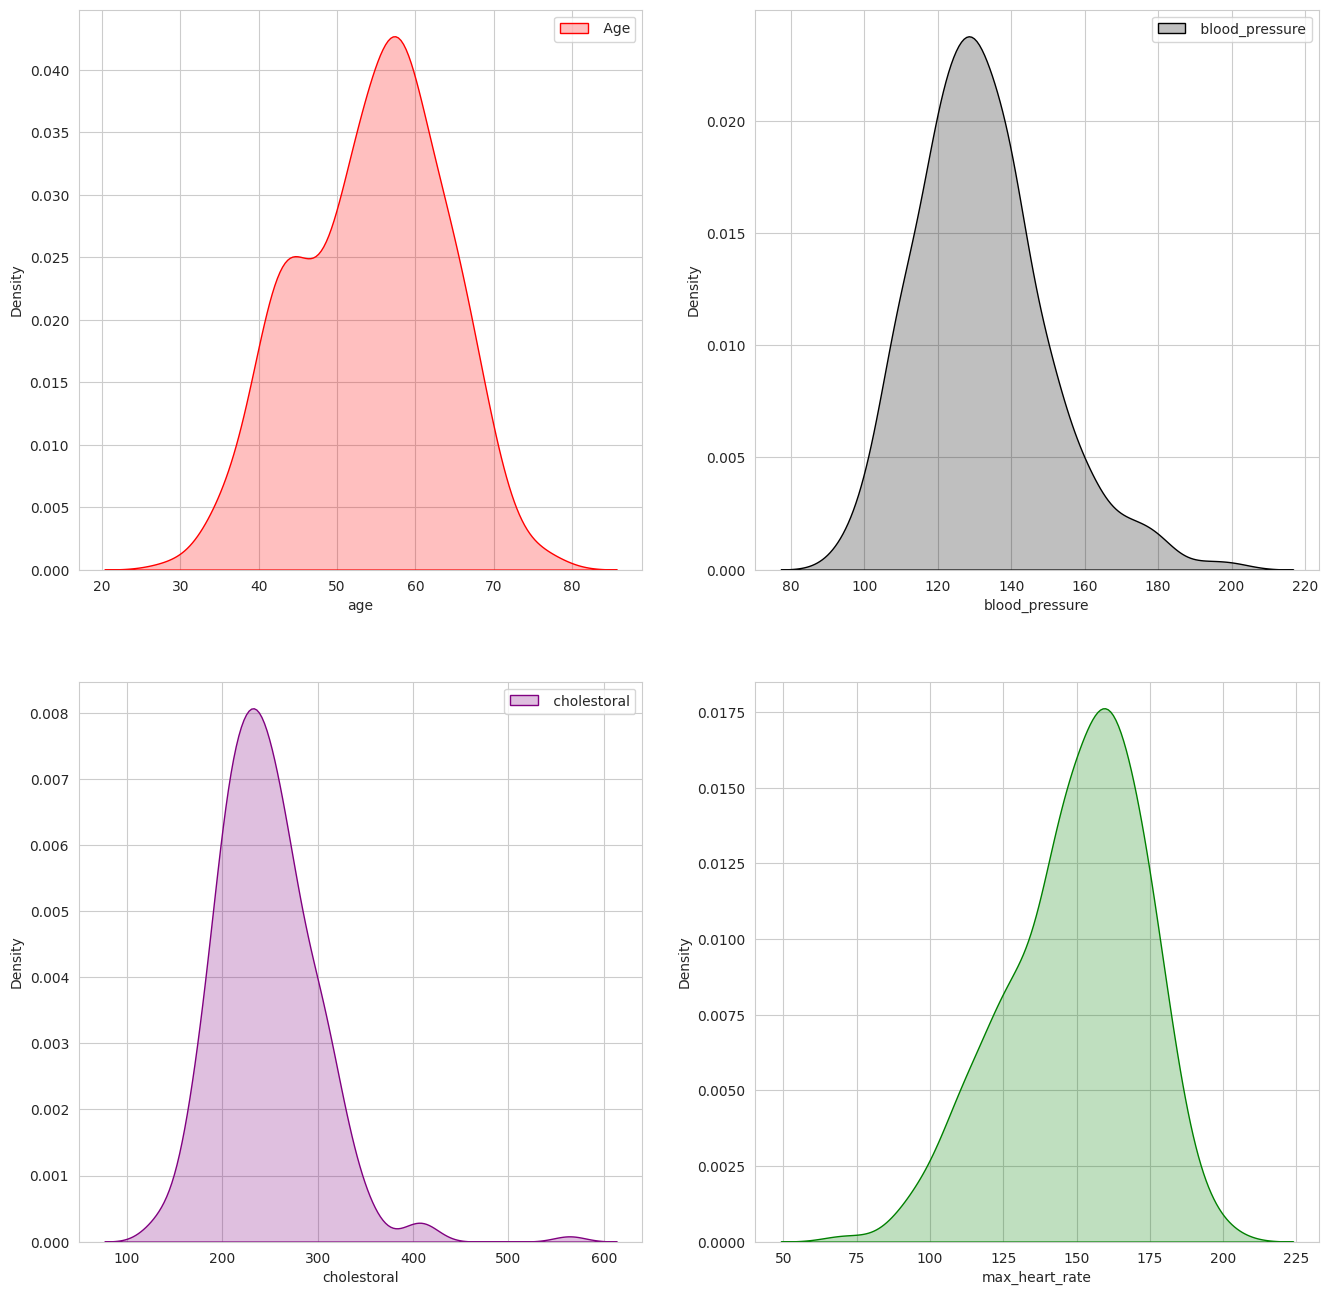

In [ ]:
with sns.axes_style('whitegrid'):

    fig=plt.figure(figsize=(16, 16))

    fig = plt.subplot(221)
    sns.kdeplot(df['age'],shade=True,label=' Age',color="red")
    plt.legend()

    fig = plt.subplot(222)
    sns.kdeplot(df['blood_pressure'],shade=True,label=' blood_pressure',color="black")
    plt.legend()

    fig = plt.subplot(223)
    sns.kdeplot(df['cholestoral'],shade=True,label=' cholestoral',color="purple")
    plt.legend()

    fig = plt.subplot(224)
    sns.kdeplot(df['max_heart_rate'],shade=True,label=' max_heart_rate',color="green")
plt.show()

1. **Age Distribution**:
   - The plot shows the frequency of individuals for each age.
   - Peaks are observed around **55–60 years**, indicating a higher concentration of individuals in this age range.

2. **Range of Ages**:
   - The ages span from **29 to 77 years** in the dataset.
   - Certain ages, such as **29, 34, and 76**, have very few individuals.

3. **Declining Frequencies**:
   - After the peak around the late 50s, the count decreases steadily for older ages (above 65 years).

4. **Balanced Visualization**:
   - The use of the "viridis" palette ensures a visually appealing gradient that transitions smoothly from one bar to the next.



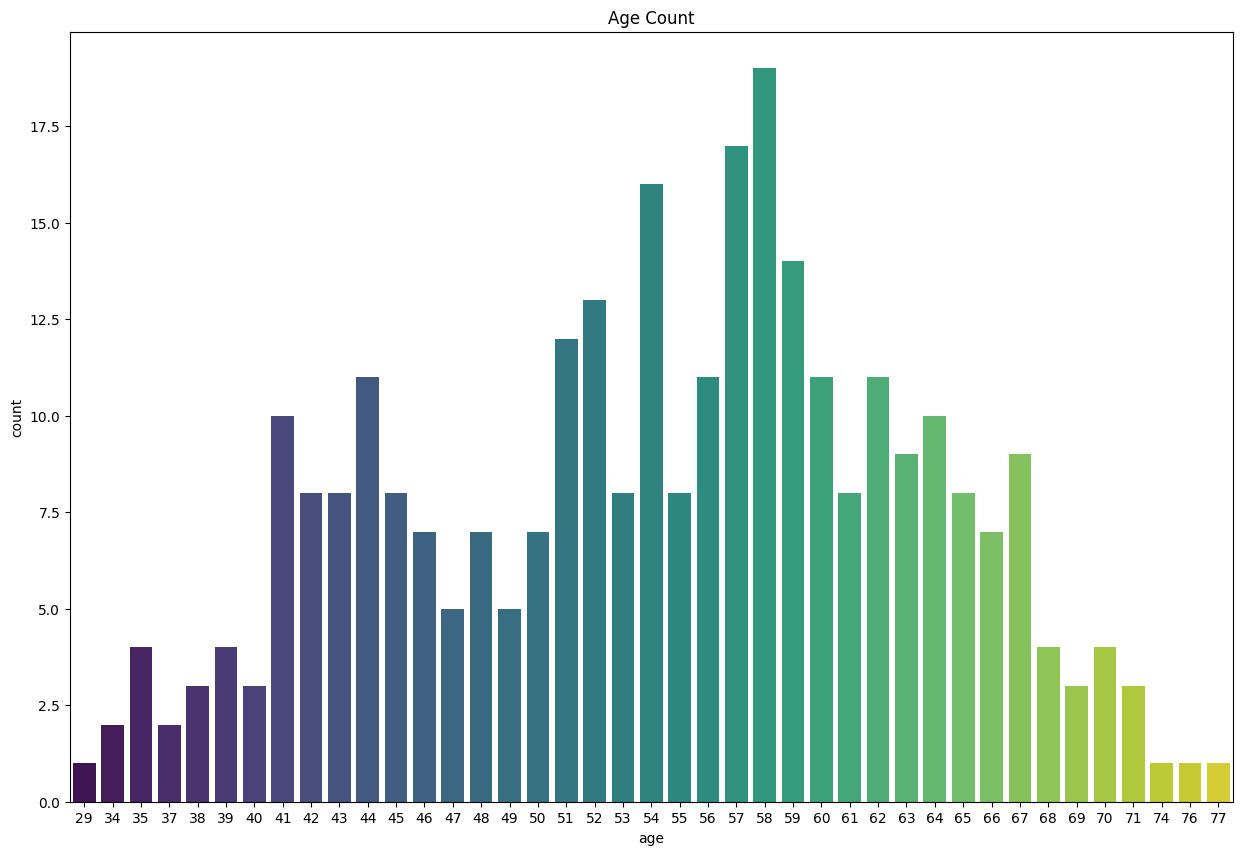

In [ ]:
plt.subplots(figsize=(15,10))
sns.countplot(data=df,x='age',palette="viridis")
plt.title( 'Age Count')
plt.show()

In [ ]:
z=df['sex'].value_counts()
fig=px.bar(z,x=z.index,y=z.values,color=z.index,text=z.values,labels={'index':'Man-Woman','y':'count','text':'count'},template='ggplot2',title='<b> male and female numbers')
fig.show()

fig=px.pie(z,names=z.index,values=z.values,labels={'index':'job title','y':'count','text':'count'},template='ggplot2')
fig.show()

In [ ]:
df3 = df[df['output'] == 'Low' ][['age','sex','cp','blood_pressure','cholestoral','fbs','restecg', 'max_heart_rate','exercise','oldpeak','slp','caa','thall','output']]

1. **Histogram**:
   - Shows the frequency of observations for each age bin.
   - Most individuals are between **50 and 60 years old**, with a peak around **55–60**.

2. **KDE Curve**:
   - Smoothly estimates the density of the age distribution.
   - Highlights the distribution's shape, which is slightly right-skewed.

3. **Gridlines**:
   - Improves readability by allowing easier comparison of bar heights.

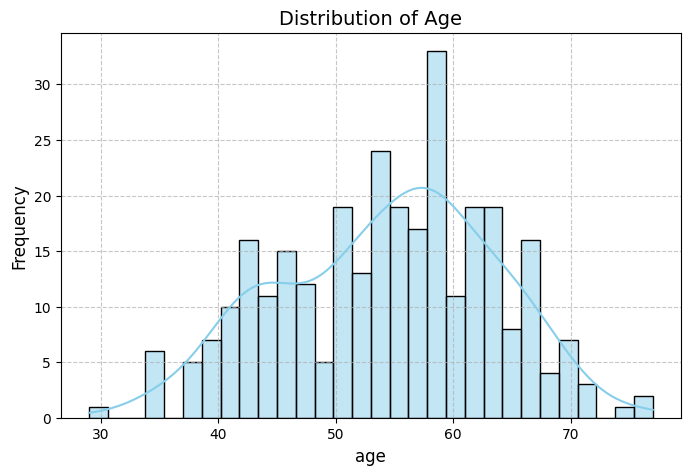

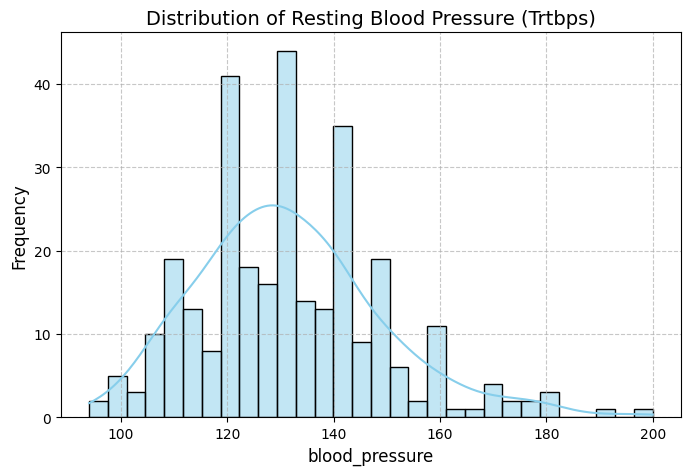

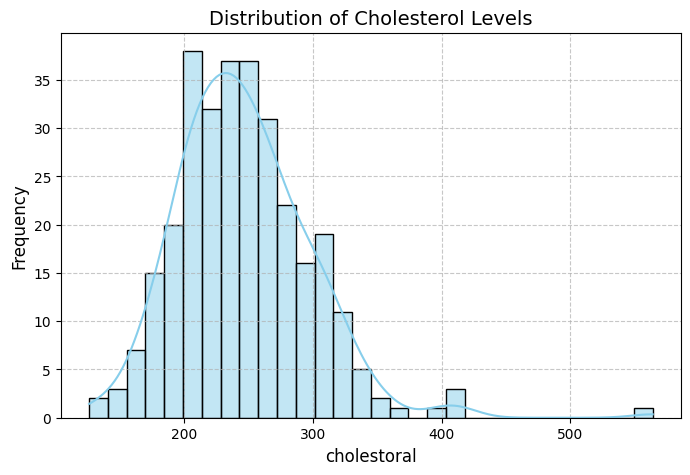

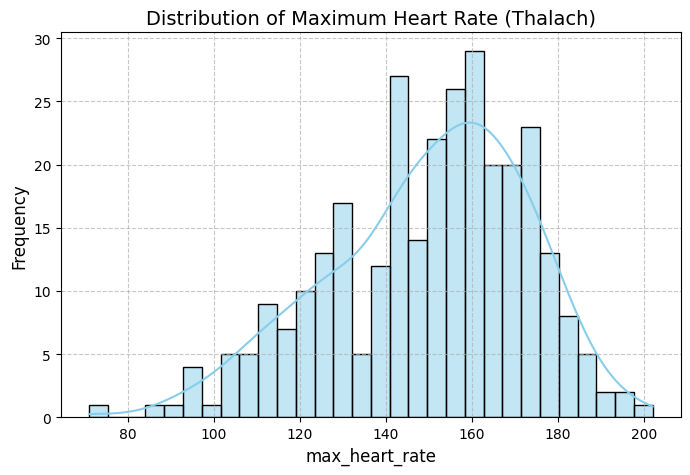

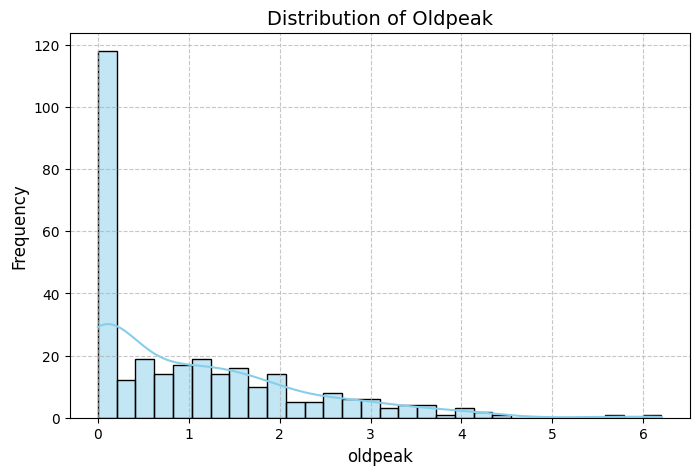

In [ ]:
# Define the numeric variables to analyze
numeric_vars = ['age', 'blood_pressure', 'cholestoral', 'max_heart_rate', 'oldpeak']
titles = [
    'Distribution of Age',
    'Distribution of Resting Blood Pressure (Trtbps)',
    'Distribution of Cholesterol Levels',
    'Distribution of Maximum Heart Rate (Thalach)',
    'Distribution of Oldpeak'
]

# Plotting distplots for each variable
for var, title in zip(numeric_vars, titles):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=var, kde=True, bins=30, color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()


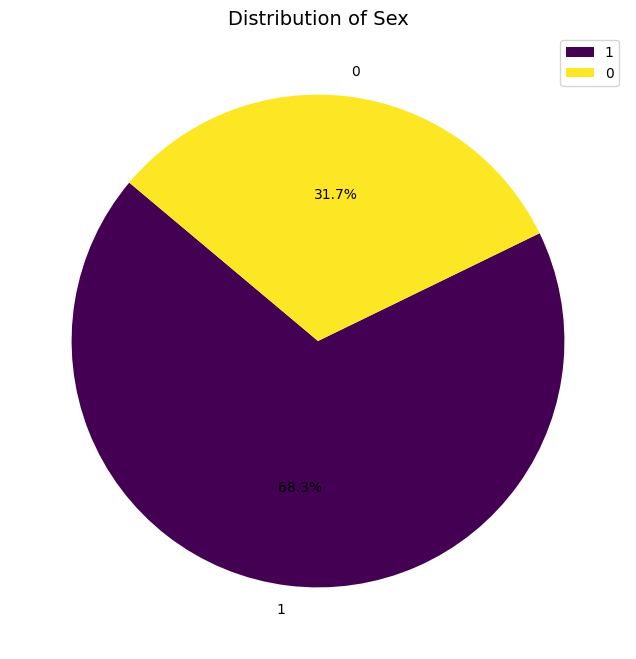

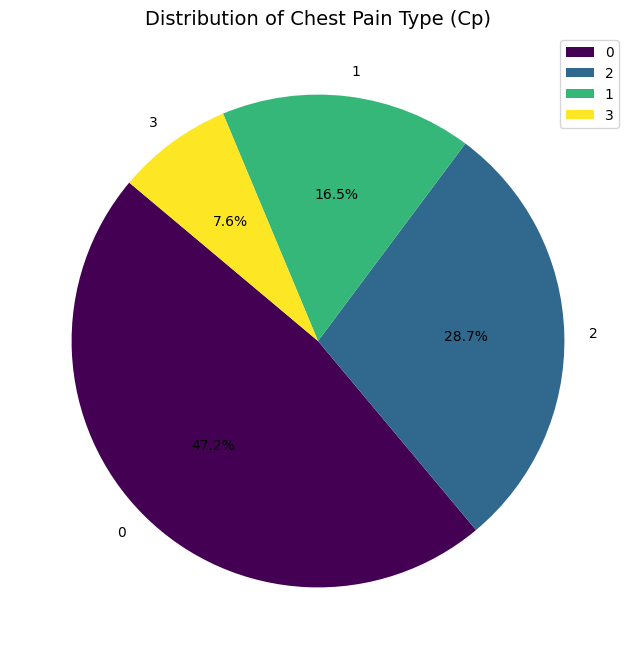

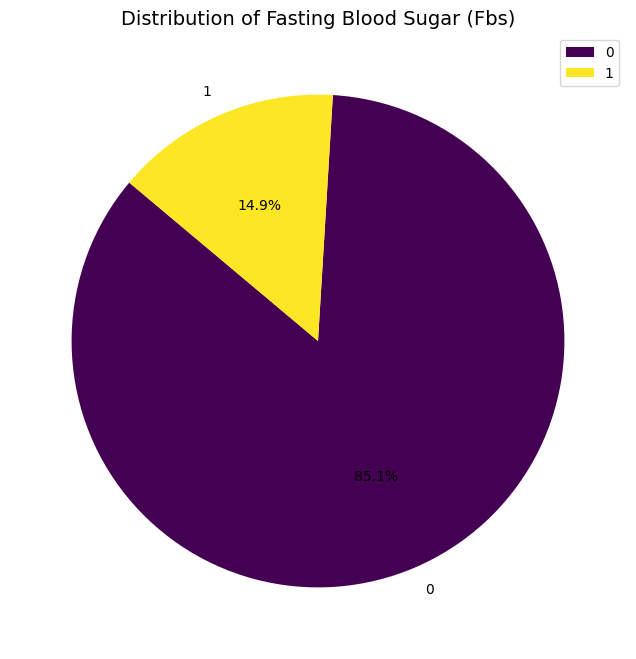

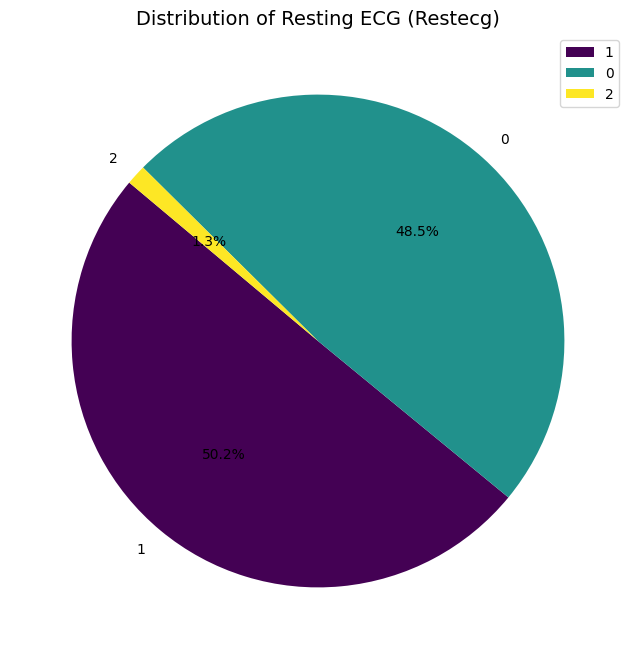

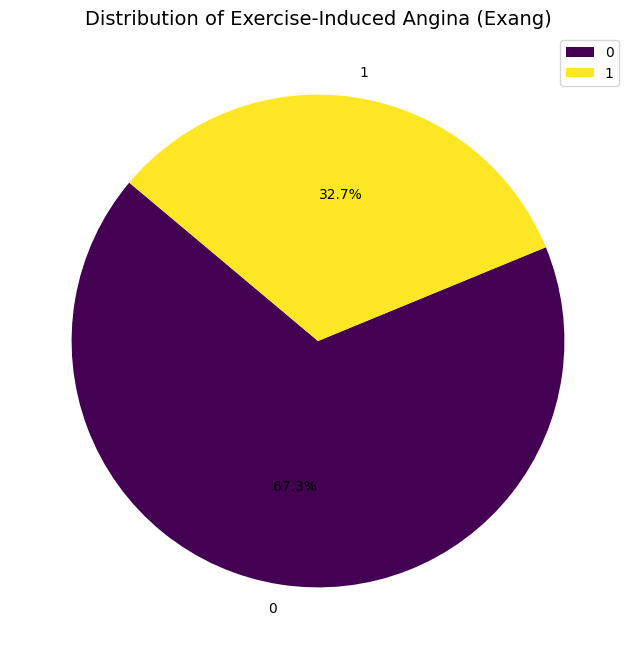

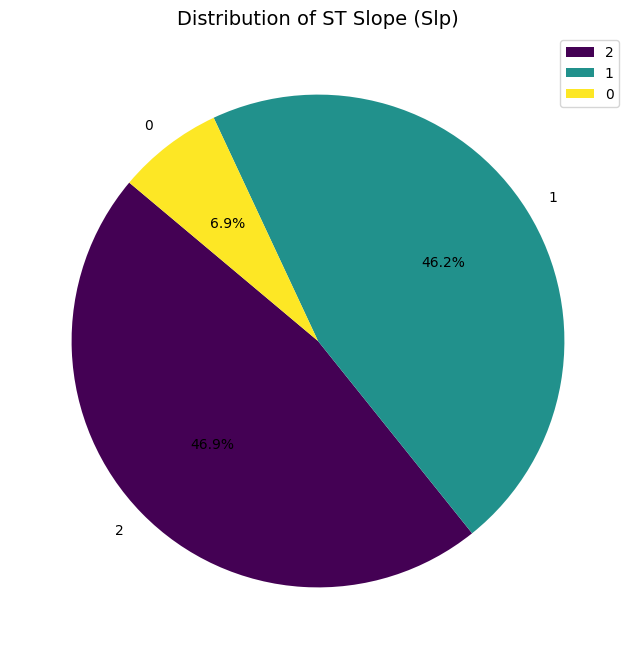

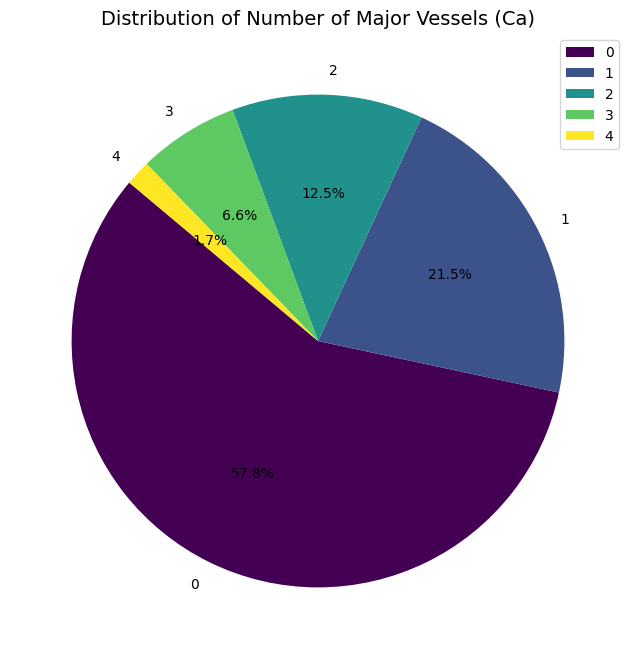

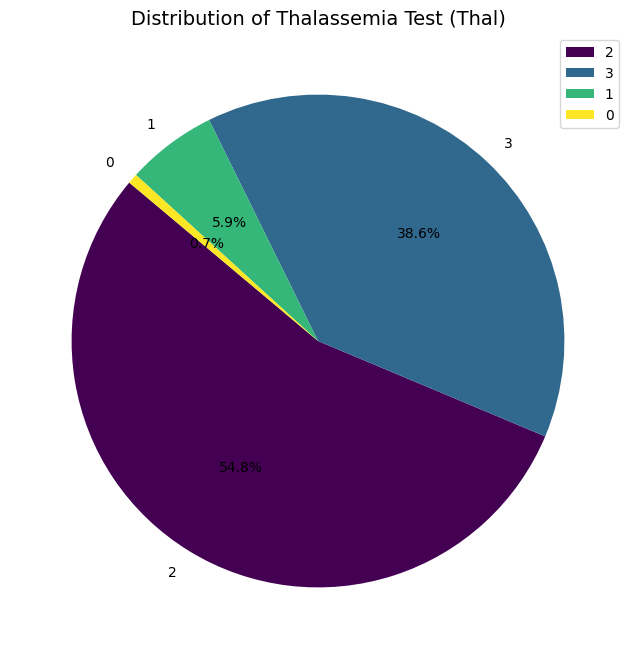

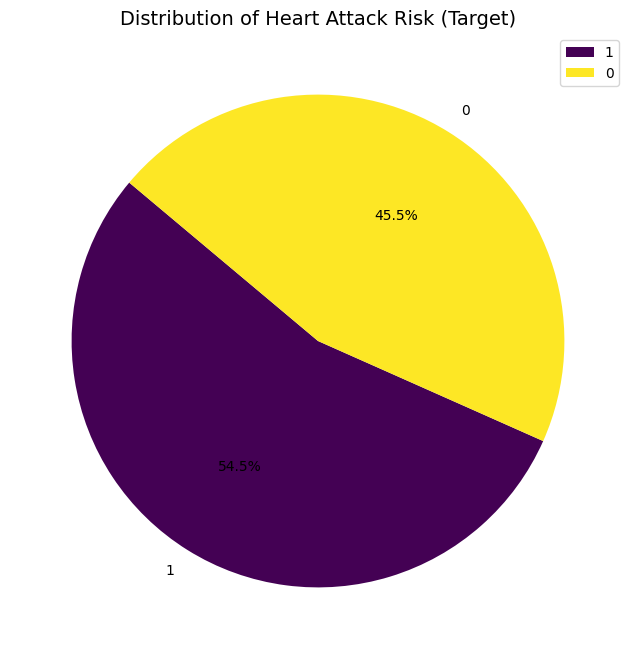

In [ ]:
# Define the categorical variables for analysis
categorical_vars = {
    'sex': 'Sex',
    'cp': 'Chest Pain Type (Cp)',
    'fbs': 'Fasting Blood Sugar (Fbs)',
    'restecg': 'Resting ECG (Restecg)',
    'exercise': 'Exercise-Induced Angina (Exang)',
    'slp': 'ST Slope (Slp)',
    'caa': 'Number of Major Vessels (Ca)',
    'thall': 'Thalassemia Test (Thal)',
    'output': 'Heart Attack Risk (Target)'
}

# Create pie charts for each categorical variable
for var, title in categorical_vars.items():
    plt.figure(figsize=(8, 8))
    df[var].value_counts().plot(
        kind='pie', autopct='%1.1f%%', startangle=140, cmap='viridis', legend=True, ylabel=''
    )
    plt.title(f'Distribution of {title}', fontsize=14)
    plt.show()


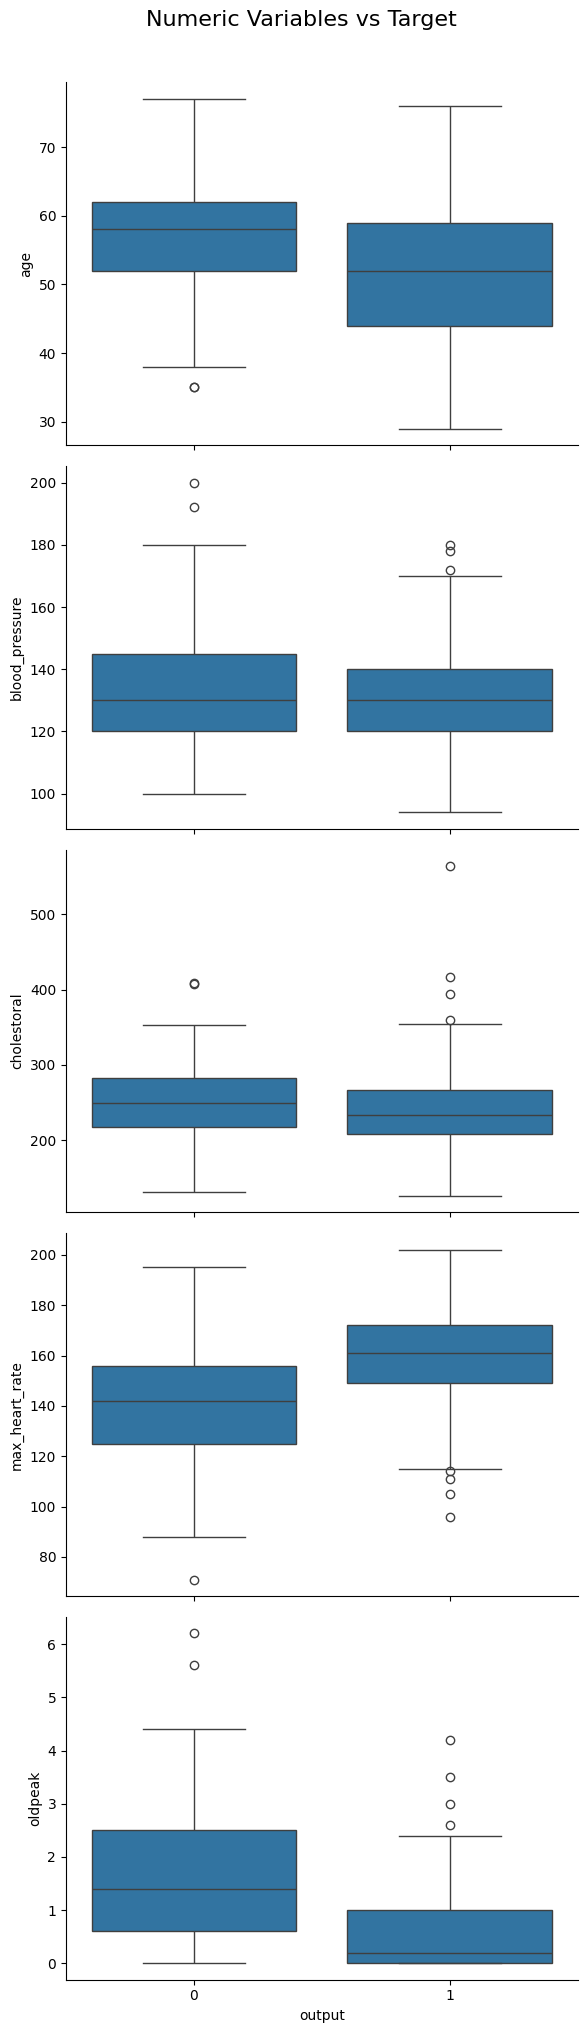

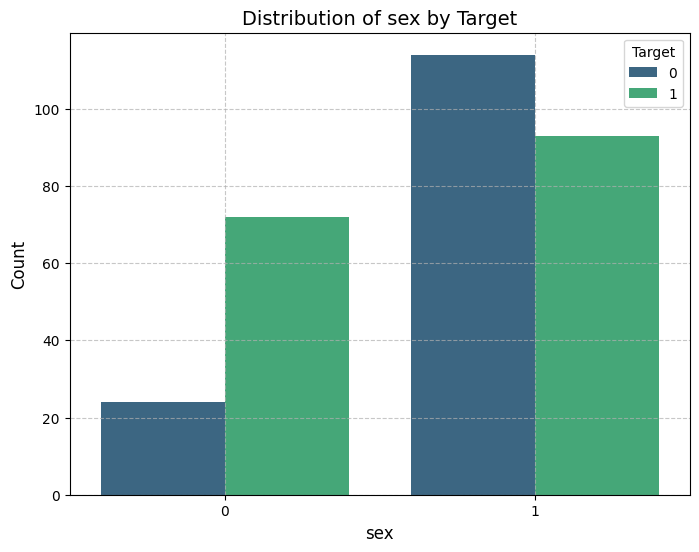

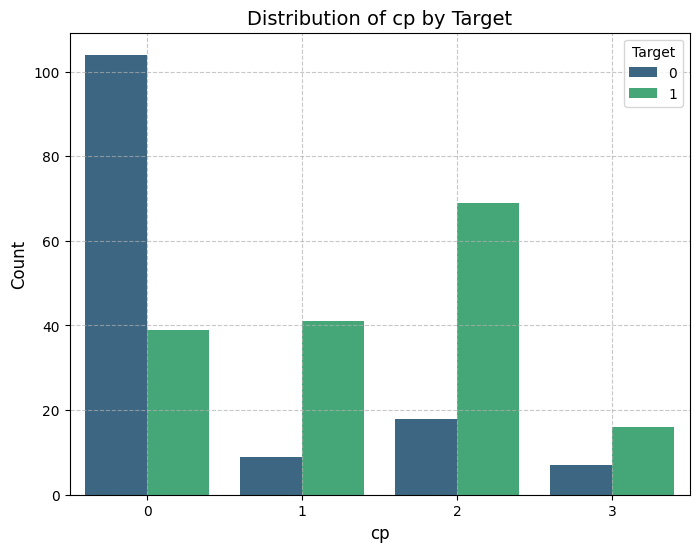

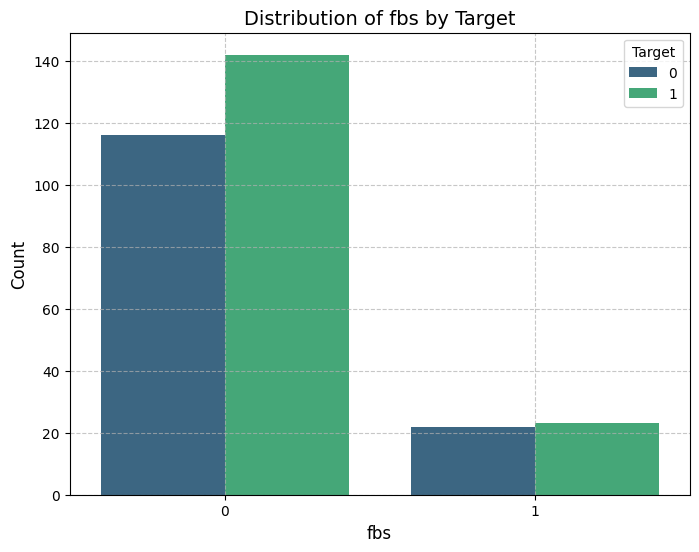

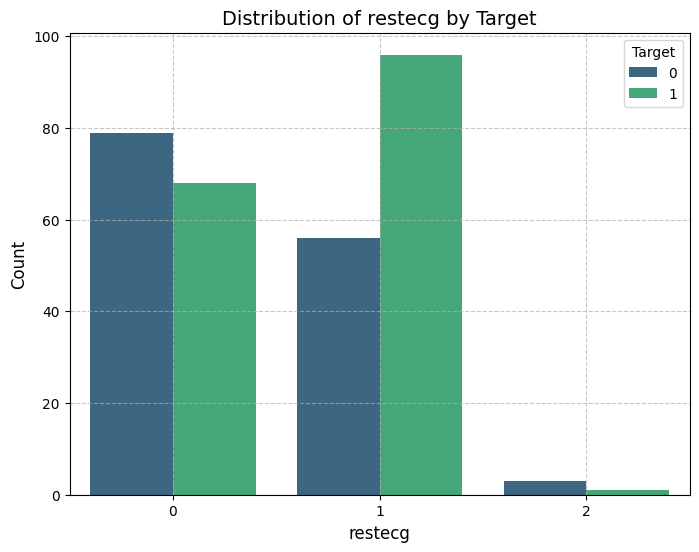

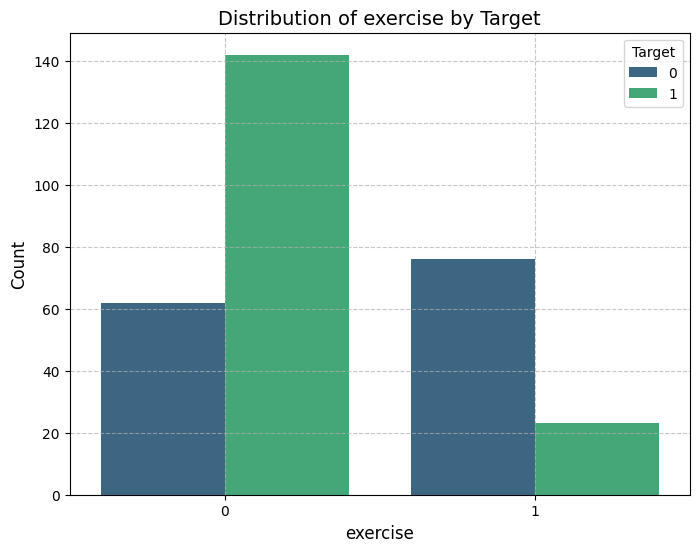

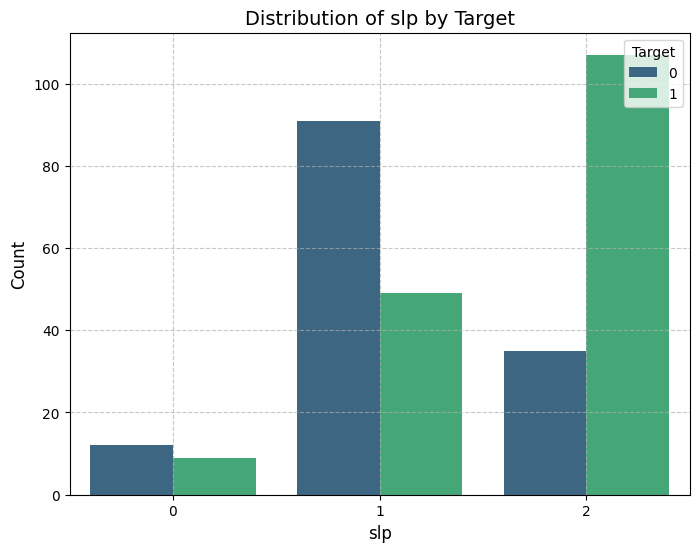

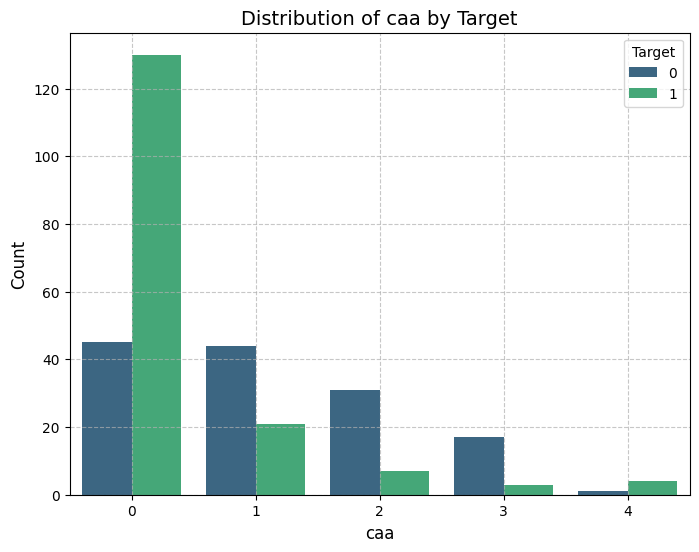

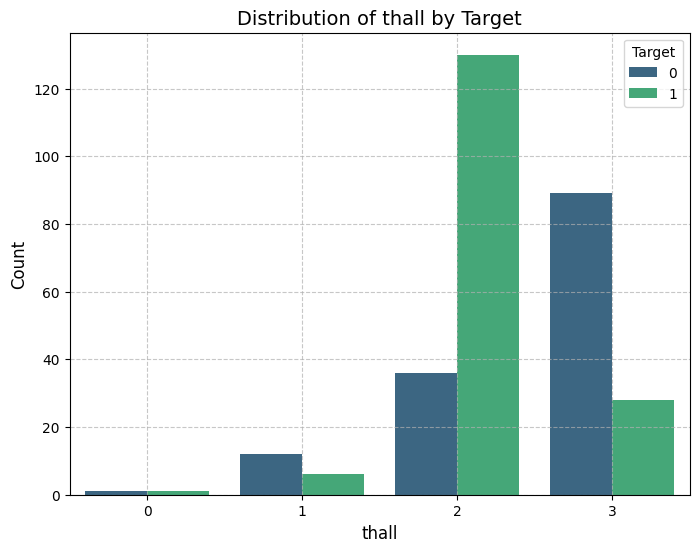

In [ ]:
from sklearn.preprocessing import RobustScaler
import seaborn as sns

# 4.2.1 Bivariate Analysis - Numeric Variables vs Target
numeric_vars_target = ['age', 'blood_pressure', 'cholestoral', 'max_heart_rate', 'oldpeak']

# Plot numeric variables against the target using FacetGrid
g = sns.PairGrid(df, y_vars=numeric_vars_target, x_vars=['output'], height=4, aspect=1.5)
g.map(sns.boxplot, palette="viridis")
g.fig.suptitle("Numeric Variables vs Target", fontsize=16, y=1.02)
plt.show()

# 4.2.2 Categorical Variables vs Target
categorical_vars_target = ['sex', 'cp', 'fbs', 'restecg', 'exercise', 'slp', 'caa', 'thall']

for var in categorical_vars_target:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=var, hue='output', palette='viridis')
    plt.title(f'Distribution of {var} by Target', fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.legend(title='Target', loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



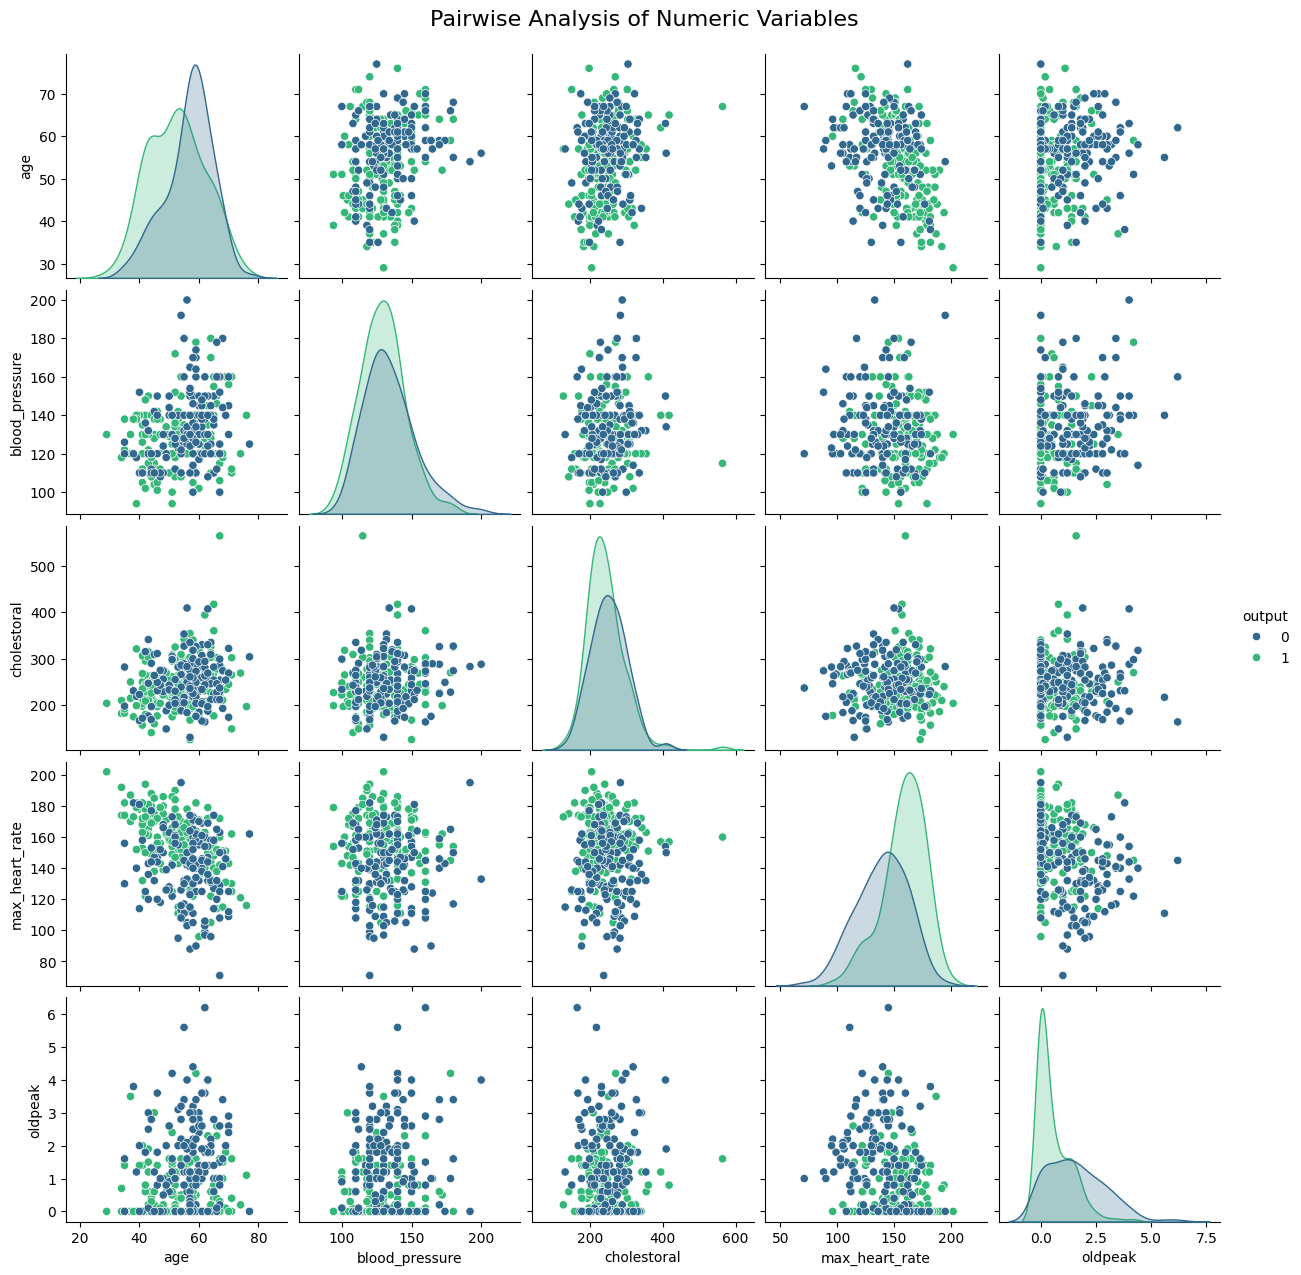

In [ ]:
# 4.2.3 Pairwise Analysis of Numeric Variables
sns.pairplot(df[numeric_vars + ['output']], hue='output', palette='viridis', diag_kind='kde')
plt.suptitle("Pairwise Analysis of Numeric Variables", fontsize=16, y=1.02)
plt.show()



In [ ]:
# 4.2.4 Feature Scaling using RobustScaler
scaler = RobustScaler()
scaled_features = pd.DataFrame(scaler.fit_transform(df[numeric_vars]), columns=numeric_vars)
print("Scaled Features:\n", scaled_features.head())



Scaled Features:
         age  blood_pressure  cholestoral  max_heart_rate  oldpeak
0  0.592593            0.75    -0.110236       -0.092308   0.9375
1 -1.333333            0.00     0.157480        1.046154   1.6875
2 -1.037037            0.00    -0.566929        0.584615   0.3750
3  0.074074           -0.50    -0.062992        0.769231   0.0000
4  0.148148           -0.50     1.795276        0.307692  -0.1250


In [ ]:
# 4.2.5 Creating a New DataFrame with Melt
melted_df = pd.melt(df, id_vars=['output'], value_vars=numeric_vars)
print("Melted DataFrame:\n", melted_df.head())

Melted DataFrame:
    output variable  value
0       1      age   63.0
1       1      age   37.0
2       1      age   41.0
3       1      age   56.0
4       1      age   57.0


- **Threshold Adjustment**:
  - Change the threshold (**`> 0.1`**) to include more or fewer features based on the problem's requirements.
- **Visual Validation**:
  - Use a heatmap or bar plot to visualize the correlation values for better understanding.

In [ ]:
# 5.1 Remove columns with low correlation
# Calculate correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable (output)
target_correlation = correlation_matrix['output'].drop('output')

# Select columns with high correlation (absolute correlation > 0.1 as threshold)
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]

print("Selected features based on correlation:\n", filtered_df.columns)




Selected features based on correlation:
 Index(['age', 'sex', 'cp', 'blood_pressure', 'restecg', 'max_heart_rate',
       'exercise', 'oldpeak', 'slp', 'caa', 'thall', 'o2_saturation',
       'output'],
      dtype='object')


1. **Visual Identification of Outliers**:
   - The boxplot highlights any data points that fall outside the whiskers, making it easy to spot outliers.

2. **Feature-Specific Outliers**:
   - By plotting each feature separately, you can determine which variables have significant outliers.

3. **Inform Decision-Making**:
   - Helps decide whether to handle outliers by:
     - Removing them.
     - Transforming the data (e.g., log transformation).
     - Using robust methods that are less sensitive to outliers.

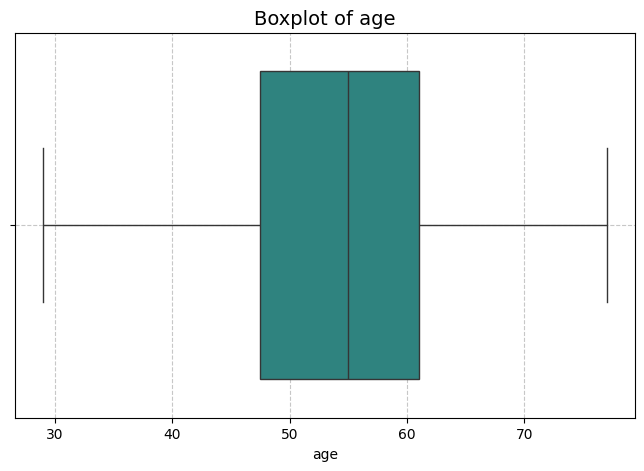

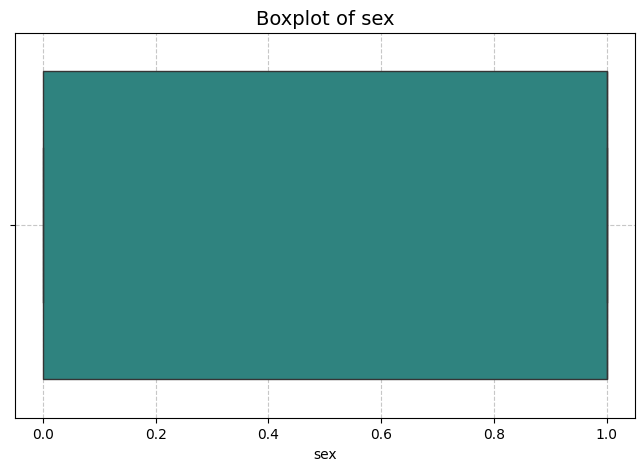

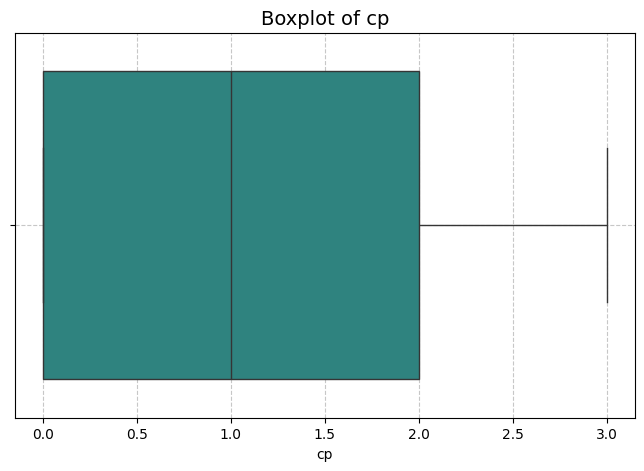

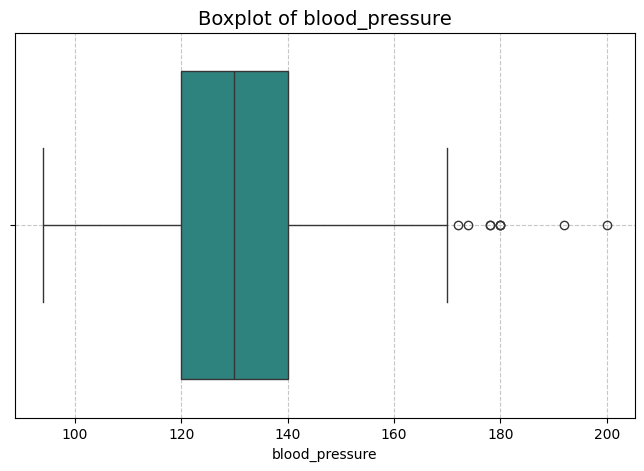

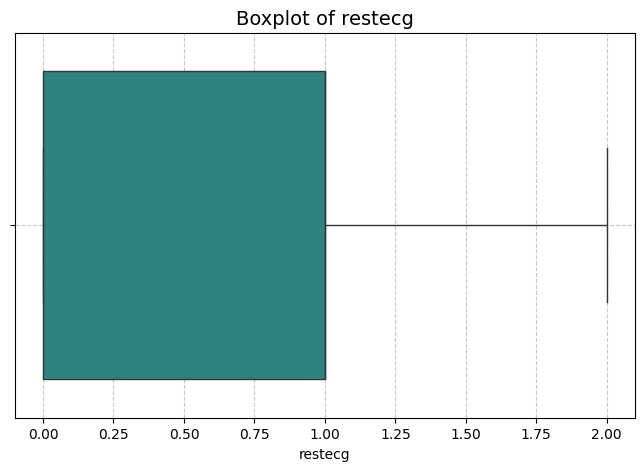

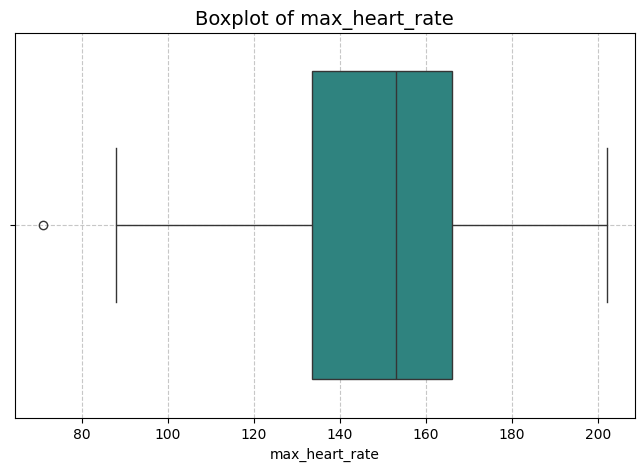

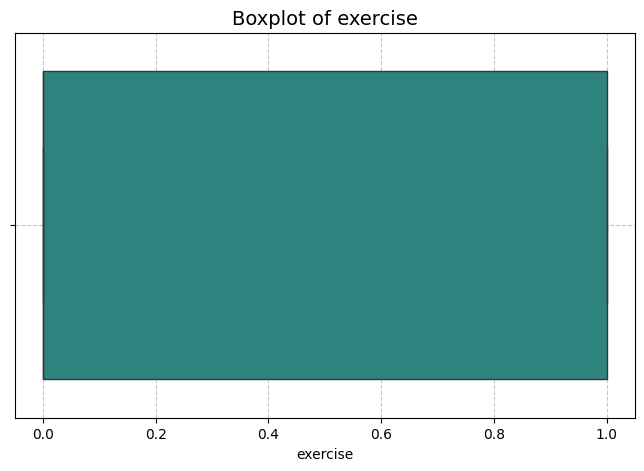

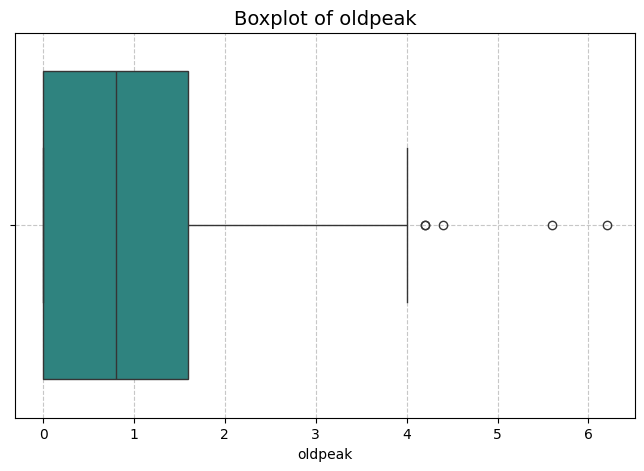

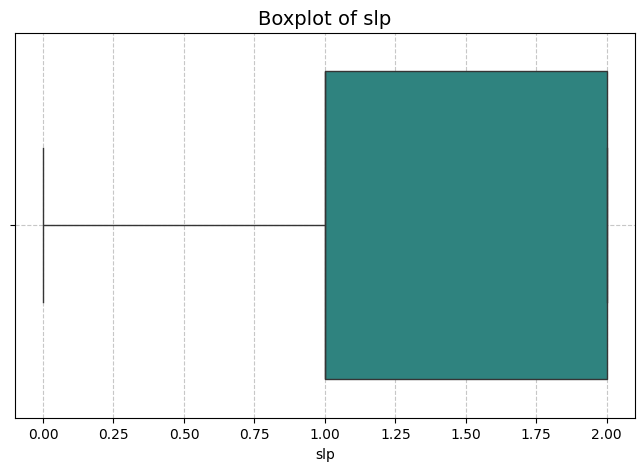

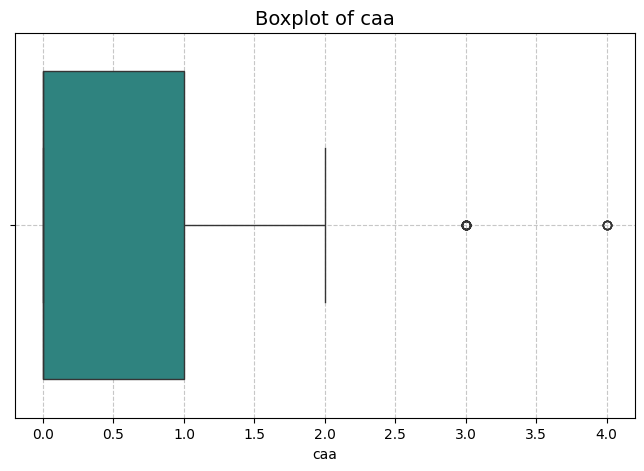

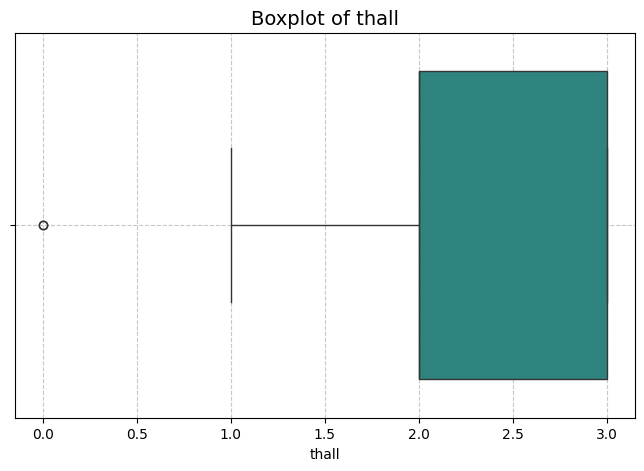

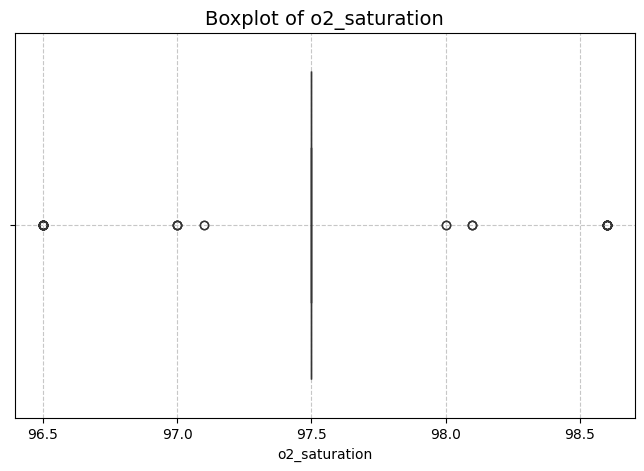

In [ ]:
# 5.2 Handling Outliers
# 5.2.1 Visualize Outliers using boxplots
for column in high_corr_features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=filtered_df, x=column, palette='viridis')
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()



In [ ]:
# 5.2.2 Handle Outliers by capping them at 1.5*IQR
for column in high_corr_features:
    Q1 = filtered_df[column].quantile(0.25)
    Q3 = filtered_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df[column] = filtered_df[column].clip(lower_bound, upper_bound)



In [ ]:
# 5.4 Transform Skewed Data
from numpy import log1p, sqrt

# Check skewness and apply transformations for highly skewed variables
for column in high_corr_features:
    skewness = filtered_df[column].skew()
    if skewness > 0.75:
        filtered_df[column] = log1p(filtered_df[column])  # Log transformation
    elif skewness < -0.75:
        filtered_df[column] = sqrt(filtered_df[column])  # Square root transformation



In [ ]:
# 5.5 Apply One-Hot Encoding to Categorical Variables
categorical_vars = ['sex', 'cp', 'blood_pressure', 'max_heart_rate', 'exercise', 'slp', 'caa', 'thall']
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars, drop_first=True)



In [ ]:
# 5.7 Split Data into Training and Test Sets
from sklearn.model_selection import train_test_split

X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (242, 149)
Test set size: (61, 149)


1. **Accuracy**:
   ```plaintext
   Accuracy of Logistic Regression Model: 0.82
   ```
   - The model correctly classified 82% of the test samples.

2. **Confusion Matrix**:
   ```plaintext
   [[25  4]
    [ 7 25]]
   ```
   - **Row 1 (Actual Class 0)**:
     - 25 samples correctly classified as 0 (True Negatives).
     - 4 samples incorrectly classified as 1 (False Positives).
   - **Row 2 (Actual Class 1)**:
     - 25 samples correctly classified as 1 (True Positives).
     - 7 samples incorrectly classified as 0 (False Negatives).

3. **Classification Report**:
   ```plaintext
                 precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61


In [ ]:
# Import necessary module for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the logistic regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on the training set
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display results
print(f"Accuracy of Logistic Regression Model: {accuracy:.2f}")
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


Accuracy of Logistic Regression Model: 0.82

Confusion Matrix:
 [[25  4]
 [ 7 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.86      0.82        29
           1       0.86      0.78      0.82        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



1. **Evaluate Model Performance**:
   - The ROC curve provides a visual way to assess how well the model separates the classes.
   - A higher AUC score reflects better performance.

2. **Threshold Selection**:
   - The ROC curve helps analyze how the classification threshold affects the trade-off between TPR and FPR.

3. **Compare Models**:
   - AUC can be used to compare the performance of multiple models on the same dataset.

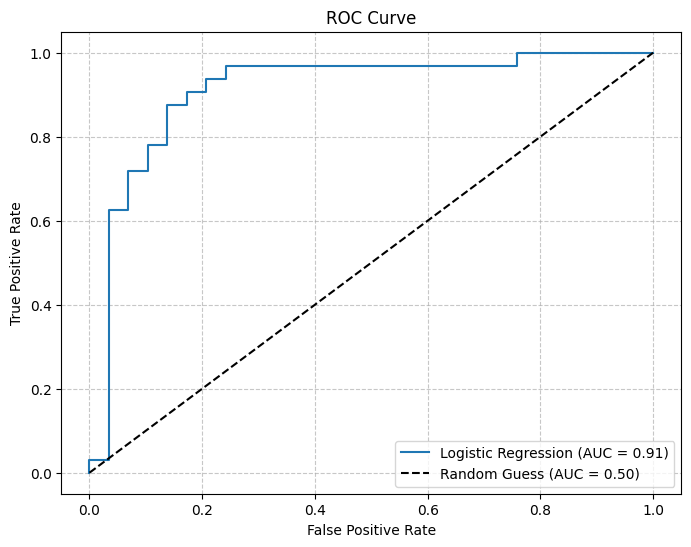

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],       # Regularization type
    'solver': ['liblinear', 'saga']  # Solvers supporting l1 and l2 penalties
}

# Initialize GridSearchCV with Logistic Regression
grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print(f"Best Cross-Validated Accuracy: {best_score:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)
print(f"Test Set Accuracy with Best Model: {best_accuracy:.2f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
Best Cross-Validated Accuracy: 0.82
Test Set Accuracy with Best Model: 0.85


In [ ]:
# Re-import necessary modules due to state reset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Redefine data preprocessing due to reset
import pandas as pd
from sklearn.preprocessing import RobustScaler

# Assuming `heart.csv` is available, reload the data

# Redefine the process of selecting features and scaling
correlation_matrix = df.corr()
target_correlation = correlation_matrix['output'].drop('output')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]

# Handle categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
categorical_vars_present = [var for var in categorical_vars if var in filtered_df.columns]
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars_present, drop_first=True)

# Split the data into training and test sets
X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simplified GridSearchCV
param_grid_simple = {
    'C': [0.1, 1, 10],  # Simplified regularization strength options
    'penalty': ['l2'],  # Using only l2 penalty for simplicity
    'solver': ['liblinear']  # Compatible solver for l2 penalty
}

grid_search_simple = GridSearchCV(
    estimator=LogisticRegression(random_state=42, max_iter=1000),
    param_grid=param_grid_simple,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
grid_search_simple.fit(X_train, y_train)

# Output the best parameters and scores
best_params_simple = grid_search_simple.best_params_
best_score_simple = grid_search_simple.best_score_
best_model_simple = grid_search_simple.best_estimator_
y_pred_best_simple = best_model_simple.predict(X_test)
best_accuracy_simple = accuracy_score(y_test, y_pred_best_simple)

(best_params_simple, best_score_simple, best_accuracy_simple)


Fitting 5 folds for each of 3 candidates, totalling 15 fits


({'C': 10, 'penalty': 'l2', 'solver': 'liblinear'},
 0.8304421768707483,
 0.8688524590163934)

In [ ]:
# Re-import necessary modules after the reset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd


# Select features based on correlation
correlation_matrix = df.corr()
target_correlation = correlation_matrix['output'].drop('output')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]

# Handle categorical variables
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
categorical_vars_present = [var for var in categorical_vars if var in filtered_df.columns]
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars_present, drop_first=True)

# Split the data into training and test sets
X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred_tree = decision_tree.predict(X_test)

# Evaluate the model
accuracy_tree = accuracy_score(y_test, y_pred_tree)
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
class_report_tree = classification_report(y_test, y_pred_tree)

# Display results
(accuracy_tree, conf_matrix_tree, class_report_tree)


(0.7213114754098361,
 array([[25,  4],
        [13, 19]]),
 '              precision    recall  f1-score   support\n\n           0       0.66      0.86      0.75        29\n           1       0.83      0.59      0.69        32\n\n    accuracy                           0.72        61\n   macro avg       0.74      0.73      0.72        61\nweighted avg       0.75      0.72      0.72        61\n')

In [ ]:
from sklearn.svm import SVC

# Initialize the SVM model
svm_model = SVC(probability=True, random_state=42)

# Define the parameter grid for GridSearchCV
svm_param_grid = {
    'C': [0.1, 1, 10],        # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
svm_grid_search.fit(X_train, y_train)

# Display the best parameters and best score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

# Evaluate the best model on the test set
svm_best_model = svm_grid_search.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)

(svm_best_params, svm_best_score, svm_test_accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
 0.8470238095238096,
 0.8688524590163934)

In [ ]:
# Re-import necessary libraries after the reset
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split

# Reload and preprocess the dataset

correlation_matrix = df.corr()
target_correlation = correlation_matrix['output'].drop('output')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
categorical_vars_present = [var for var in categorical_vars if var in filtered_df.columns]
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars_present, drop_first=True)
X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the SVM model and parameter grid
svm_model = SVC(probability=True, random_state=42)
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Initialize GridSearchCV
svm_grid_search = GridSearchCV(
    estimator=svm_model,
    param_grid=svm_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
svm_grid_search.fit(X_train, y_train)

# Display the best parameters and best score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

# Evaluate the best model on the test set
svm_best_model = svm_grid_search.best_estimator_
y_pred_svm = svm_best_model.predict(X_test)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm)

(svm_best_params, svm_best_score, svm_test_accuracy)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


({'C': 10, 'gamma': 'scale', 'kernel': 'linear'},
 0.8470238095238096,
 0.8688524590163934)

In [ ]:
# Re-import necessary libraries after the reset
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd


correlation_matrix = df.corr()
target_correlation = correlation_matrix['output'].drop('output')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
categorical_vars_present = [var for var in categorical_vars if var in filtered_df.columns]
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars_present, drop_first=True)
X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model and parameter grid
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize GridSearchCV
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Perform the grid search
rf_grid_search.fit(X_train, y_train)

# Display the best parameters and best score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

# Evaluate the best model on the test set
rf_best_model = rf_grid_search.best_estimator_
y_pred_rf = rf_best_model.predict(X_test)
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)

(rf_best_params, rf_best_score, rf_test_accuracy)


Fitting 5 folds for each of 162 candidates, totalling 810 fits


({'bootstrap': False,
  'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 5,
  'n_estimators': 100},
 0.8221088435374149,
 0.8360655737704918)

1. **Best Parameters**:
   ```python
   {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
   ```
   - The best model uses a regularization strength `C=1`, L2 penalty, and `liblinear` solver.

2. **Best Cross-Validation Accuracy**:
   ```python
   Best CV Score: 0.87
   ```
   - The best model achieved 87% accuracy on the cross-validated training data.

3. **Test Set Results**:
   - **Accuracy**:
     ```plaintext
     Test Set Accuracy: 0.87
     ```
     - The model achieved 87% accuracy on the test set.

   - **Confusion Matrix**:
     ```plaintext
     [[26,  3],
      [ 5, 27]]
     ```
     - True Negatives: 26
     - False Positives: 3
     - False Negatives: 5
     - True Positives: 27

   - **Classification Report**:
     ```plaintext
                   precision    recall  f1-score   support

             0       0.84      0.90      0.87        29
             1       0.90      0.84      0.87        32

     accuracy                           0.87        61
    macro avg       0.87      0.87      0.87        61
 weighted avg       0.87      0.87      0.87        61


In [ ]:
# Re-import necessary libraries due to state reset
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd


correlation_matrix = df.corr()
target_correlation = correlation_matrix['output'].drop('output')
high_corr_features = target_correlation[abs(target_correlation) > 0.1].index.tolist()
filtered_df = df[high_corr_features + ['output']]
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']
categorical_vars_present = [var for var in categorical_vars if var in filtered_df.columns]
encoded_df = pd.get_dummies(filtered_df, columns=categorical_vars_present, drop_first=True)
X = encoded_df.drop('output', axis=1)
y = encoded_df['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a default Neural Network model
default_nn_model = MLPClassifier(random_state=42, max_iter=1000)
default_nn_model.fit(X_train, y_train)

# Predict on the test data
y_pred_nn_default = default_nn_model.predict(X_test)

# Evaluate the model
accuracy_nn_default = accuracy_score(y_test, y_pred_nn_default)
conf_matrix_nn_default = confusion_matrix(y_test, y_pred_nn_default)
class_report_nn_default = classification_report(y_test, y_pred_nn_default)

(accuracy_nn_default, conf_matrix_nn_default, class_report_nn_default)


(0.8688524590163934,
 array([[26,  3],
        [ 5, 27]]),
 '              precision    recall  f1-score   support\n\n           0       0.84      0.90      0.87        29\n           1       0.90      0.84      0.87        32\n\n    accuracy                           0.87        61\n   macro avg       0.87      0.87      0.87        61\nweighted avg       0.87      0.87      0.87        61\n')

# Conclustion

1. **Top Positive Contributors**:
   - **`cp_3` (1.49)** and **`cp_2` (1.32)**: These features have the strongest positive impact on predicting the positive class.

2. **Top Negative Contributors**:
   - **`caa_2` (-1.77)** and **`sex_1` (-1.13)**: These features have the strongest negative impact on predicting the positive class.

3. **Weak Contributors**:
   - Features like **`age` (0.0039)** and **`blood_pressure` (-0.0169)** have minimal influence on the prediction, indicating weak relationships with the target variable.


#### **Logistic Regression Equation**
The prediction probability for the positive class (\( P(y=1) \)) can be expressed as:

\[
P(y=1) = \frac{1}{1 + e^{-(\beta_0 + \sum \beta_i \cdot X_i)}}
\]

Where:
- \( \beta_0 = -10.34422306 \) (intercept)
- \( \beta_i \): Coefficients of features
- \( X_i \): Values of the features

**Refine the Model**:
   - Consider removing weak contributors like `age` or `blood_pressure` to simplify the model.
   - Test performance on unseen data after removing insignificant features.


In [ ]:
# Import necessary module for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

# Initialize the logistic regression model
logre = LogisticRegression(random_state=42, max_iter=1000) # Assign the model to 'logre'

# Train the model on the training set (X_train, y_train) - Assuming you have these from your previous code
logre.fit(X_train, y_train)  # This line is crucial!

print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients # Corrected the typo here

[-10.34422306]


,Coeffecient
cp_3,1.486691
cp_2,1.324357
caa_4,0.942292
slp_2,0.511385
cp_1,0.429362
thall_2,0.404380
restecg_1,0.335994
thall_1,0.204966
o2_saturation,0.125128
max_heart_rate,0.012239


<Figure size 1000x1200 with 0 Axes>

In [ ]:
df4 = df[df['output'] == 0 ][['age', 'sex', 'cp', 'blood_pressure','cholestoral', 'fbs',
                              'restecg', 'max_heart_rate', 'exercise', 'oldpeak','slp','caa',
                              'thall','output']] #target 0 - people with heart disease

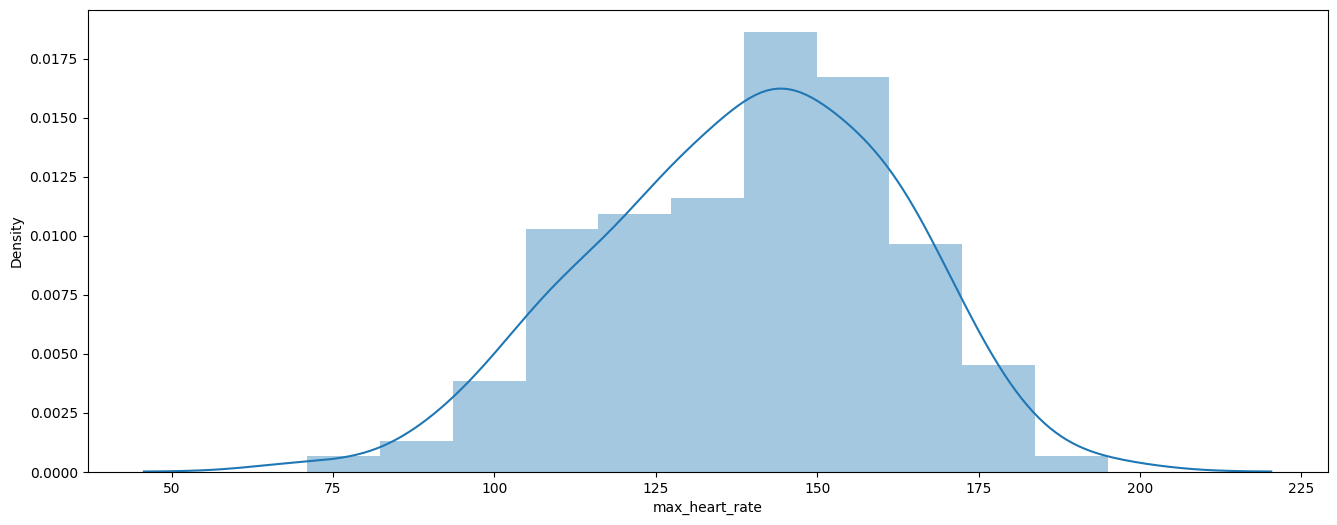

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate']) # Changed column name to 'max_heart_rate'
plt.show() # Adding plt.show() to display the plot

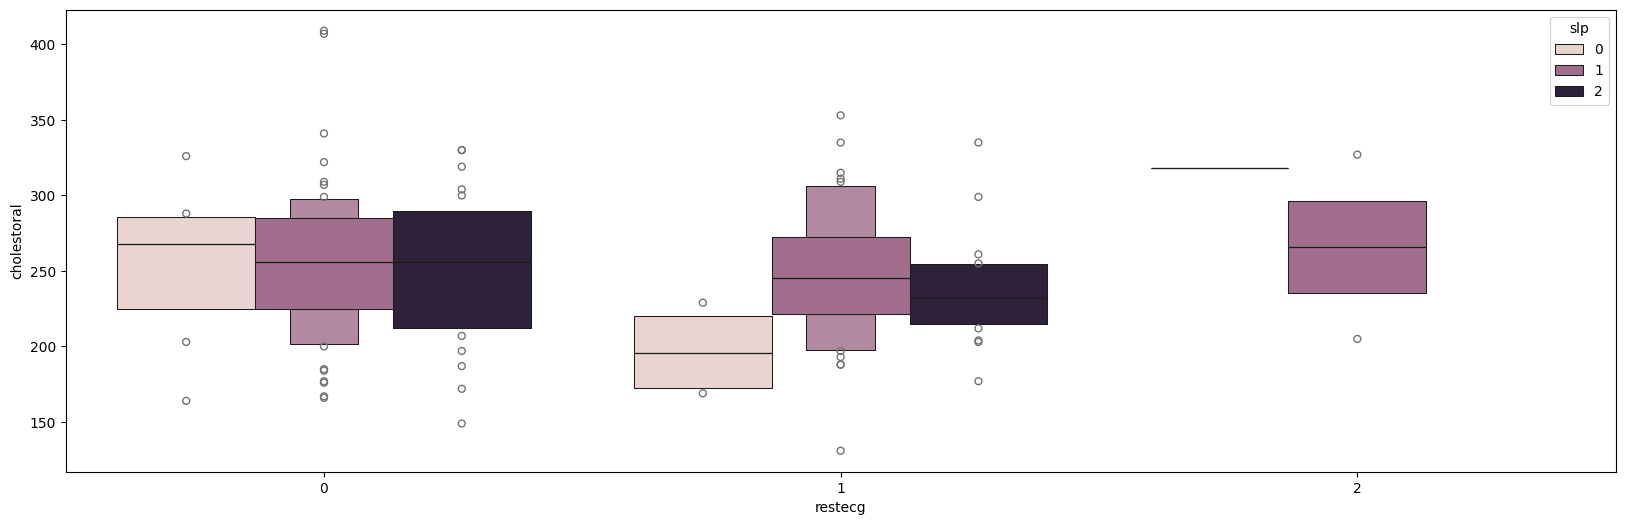

In [ ]:
plt.figure(figsize=(20,6))
sns.boxenplot(data=df4,x='restecg',y='cholestoral',hue='slp') # using the original column names
plt.show()

<Axes: >

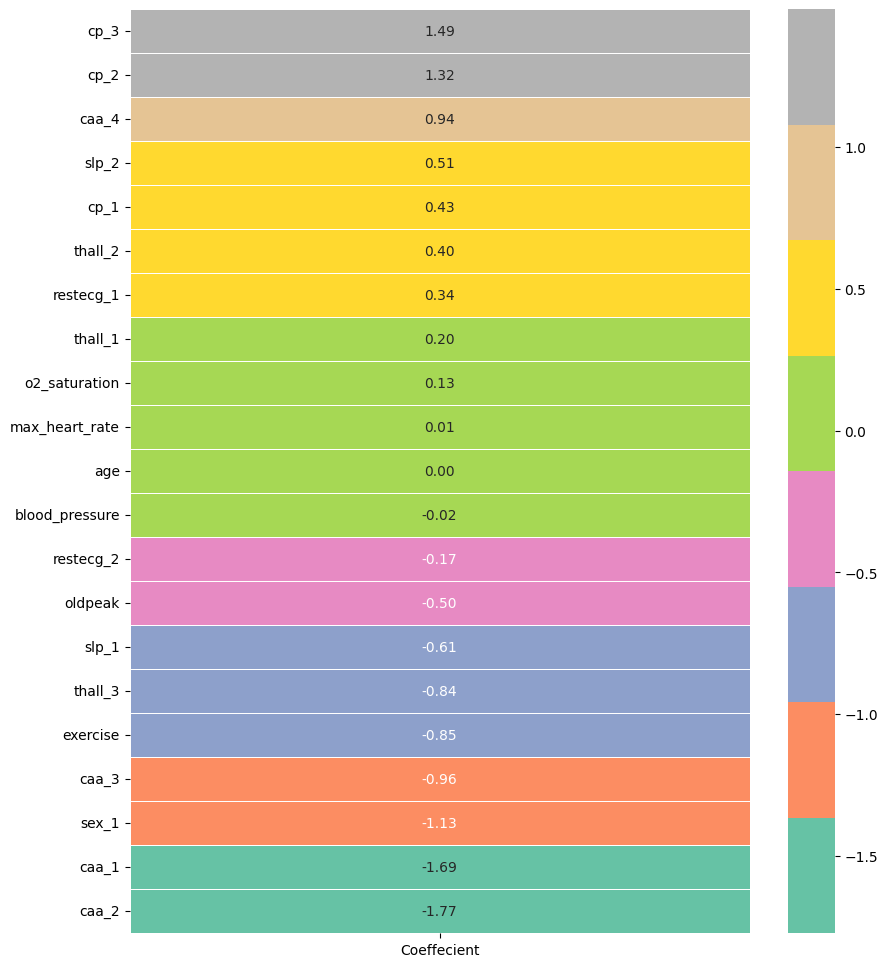

In [ ]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)